# Transfer Learning with TensorFlow: Fine Tuning

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [1]:
# Download helper functions
!wget "https://raw.githubusercontent.com/molleremil/helper_functions/main/tf_helper_func.py"

--2023-12-07 16:06:17--  https://raw.githubusercontent.com/molleremil/helper_functions/main/tf_helper_func.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10297 (10K) [text/plain]
Saving to: ‘tf_helper_func.py’

tf_helper_func.py   100%[===================>]  10.06K  --.-KB/s    in 0s      

2023-12-07 16:06:17 (98.0 MB/s) - ‘tf_helper_func.py’ saved [10297/10297]



In [2]:
# Import helper functions
from tf_helper_func import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

# 1. Import the Data

In [ ]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"

--2023-12-06 10:28:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.207, 142.251.162.207, 173.194.213.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   102MB/s    in 1.6s    

2023-12-06 10:28:44 (102 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
# Create training and test directory paths
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)

print(f"Number of images in train dataset:")
train_data_10_pct = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    batch_size=32,
    label_mode="categorical"
)

print(f"Number of images in test:")
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=32
)

Number of images in train dataset:
Found 750 files belonging to 10 classes.
Number of images in test:
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_pct

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_pct.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_pct.take(1):
  print(images, labels)

tf.Tensor(
[[[[3.73571434e+01 3.63571434e+01 5.23571434e+01]
   [3.73571434e+01 3.63571434e+01 5.23571434e+01]
   [3.68622437e+01 3.58622437e+01 5.18622437e+01]
   ...
   [2.04933334e+02 2.18862015e+02 2.01443420e+02]
   [1.62163055e+02 1.90479446e+02 1.41137421e+02]
   [1.27586342e+02 1.65683350e+02 9.13973923e+01]]

  [[3.68571434e+01 3.78571434e+01 5.58571434e+01]
   [3.59285736e+01 3.69285736e+01 5.49285736e+01]
   [3.78010216e+01 3.98010216e+01 5.48010216e+01]
   ...
   [2.22958923e+02 2.33688644e+02 2.24703812e+02]
   [1.89714081e+02 2.11280457e+02 1.78984421e+02]
   [1.53545502e+02 1.82193497e+02 1.30596390e+02]]

  [[3.61377563e+01 3.91377563e+01 5.61377563e+01]
   [3.74132652e+01 4.04132652e+01 5.74132652e+01]
   [3.71224480e+01 4.01224480e+01 5.71224480e+01]
   ...
   [2.39556015e+02 2.43642838e+02 2.45387665e+02]
   [2.25489700e+02 2.36362183e+02 2.28178452e+02]
   [2.05867050e+02 2.21938507e+02 2.04300659e+02]]

  ...

  [[9.80656357e+01 1.03065636e+02 1.45065643e+02]
   [1

# Build model using the Keras functional API

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
import datetime

# Setup TensorBoard callback function
def create_tensorboard_callbacks(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras import layers


# 1. Create model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# 2. Freeze the base model, so the underlying pre-trained patterns aren't updated during training
base_model.trainable = False

# 3. Create inputs into our model
inputs = keras.Input(shape=(224, 224, 3), name="input_layer")

# 4. If choosing to use a model like ResNet50V2 you'll need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass inputs to the basemodel
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce the number of computations)
x = keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

#10. Fit the model
history_0 = model_0.fit(train_data_10_pct,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_pct),
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callbacks(dir_name="transfer_learning",
                                                              experiment_name="10_percent_feature_extraction")])

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20231206-103436
Epoch 1/5
24/24 [==============================] - 102s 4s/step - loss: 1.8753 - accuracy: 0.4053 - val_loss: 1.2864 - val_accuracy: 0.7451
Epoch 2/5
24/24 [==============================] - 84s 4s/step - loss: 1.1350 - accuracy: 0.7453 - val_loss: 0.8832 - val_accuracy: 0.8339
Epoch 3/5
24/24 [==============================] - 84s 4s/step - loss: 0.8419 - accuracy: 0.8133 - val_loss: 0.6770 - val_accuracy: 0.8849
Epoch 4/5
24/24 [==============================] - 81s 3s/step - loss: 0.6789 - accuracy: 0.8440 - val_loss: 0.5901 - val_accuracy: 0.8865
Epoch 5/5
24/24 [==============================] - 88s 4s/step - loss: 0.5866 - accuracy: 0.8627 - val_loss: 0.5420 - val_accuracy: 0.8832


In [ ]:
# Evaluate model_0 on all the test data
model_0.evaluate(test_data)

79/79 [==============================] - 152s 2s/step - loss: 0.5677 - accuracy: 0.8656


[0.5677170157432556, 0.8655999898910522]

In [ ]:
# Check layers in base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_3
1 rescaling_2
2 normalization_2
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 b

In [ ]:
# Check summary of base model
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, None, None, 3)        0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, None, None, 3)        0         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [ ]:
# Check summary of model_0
model_0.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
________________

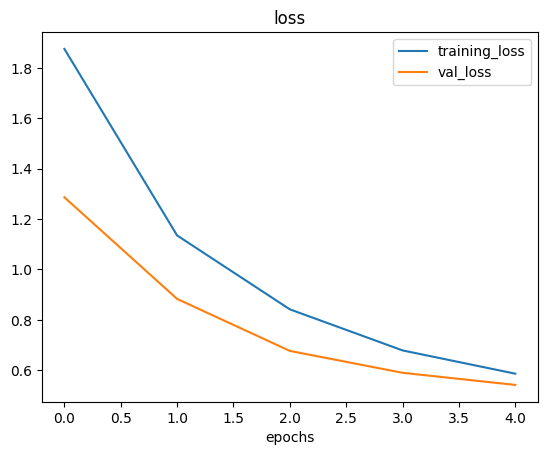

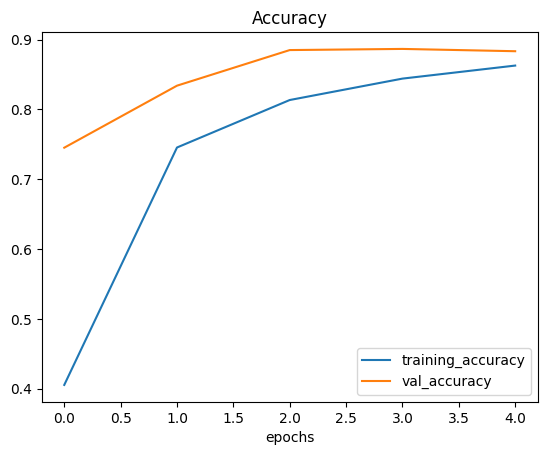

In [ ]:
# Check out model's training curves
plot_loss_curves(history_0)

## Get a feature vector from a trained model

Demonstrating the Global Average Pooling 2D layer

At the moment we have a tensor after our model goes through `base_model`of shape (None, 7, 7, 1280).

But when passing through the GlobalAveragePooling2D layer, it turns into (None, 1280) -> reducing dimensions -> turning a 4D tensor to a 2D tensor and returns a `feature vector`.

--> A feature vector is a learned feature representation of the input data, a compressed form of the input data based on how the model sees it.



In [ ]:
# Define input shape
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2d layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor (feature vector):\n {global_average_pooled_tensor}\n")

# Print shape of input tensor and GAP2D
print(f"Shape of input_tensor:\n {input_tensor.shape} \n Shape of global average pooled random tensor:\n {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

2D global average pooled random tensor (feature vector):
 [[-0.09368646 -0.45840445 -0.28855976]]

Shape of input_tensor:
 (1, 4, 4, 3) 
 Shape of global average pooled random tensor:
 (1, 3)


In [ ]:
# Replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

- GlobalAveragePool2D reduces the tensors dimensions on axis 1 and 2 to the mean of their values - in form of a vector.

In [ ]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)

max_pooled_tensor = tf.keras.layers.MaxPool2D()(input_tensor)

print(f"Input tensor:\n {input_tensor} \n max_pooled_tensor:\n {max_pooled_tensor}")

print(f"Shape max_pooled_tensor:\n {max_pooled_tensor.shape}")

Input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]] 
 max_pooled_tensor:
 [[[[ 0.8504023  -0.40604794  0.3194337 ]
   [ 0.9058464   0.539707    1.6994323 ]]

  [[ 0.77852213  0.40125778  0.97772694]
   [ 0.32410017  1.1603122   0.5274477 ]]]]
Shape max_pooled_tensor:
 (1, 2, 2, 3)


In [ ]:
tf.math.reduce_max(input_tensor, axis=2)

<tf.Tensor: shape=(1, 4, 3), dtype=float32, numpy=
array([[[ 0.3274685 ,  0.539707  ,  1.6994323 ],
        [ 0.9058464 ,  0.29855987, -0.22561555],
        [ 0.77852213,  1.1603122 ,  0.97772694],
        [ 0.10815629,  0.88698626,  0.5274477 ]]], dtype=float32)>

# A series of transfer learning experiments

1. `model_1`- use feature extraction transfer learning with 1% of the training data with data augmentation.

2. `model_2`- use feature extraction transfer learning with 10% of the training with data augmentation.

3. `model_3`- use fine tuning transfer learning on 10% of the training data with data augmentation.

4. `model_4` - use fine-tuning transfer learning on 100% of the training data with data augmentation.

## Getting and preprocessing data for model_1

In [3]:
# Download and unzip data
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip"

unzip_data("10_food_classes_1_percent.zip")

--2023-12-07 16:09:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   138MB/s    in 0.9s    

2023-12-07 16:09:07 (138 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [4]:
train_dir_1_pct = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [5]:
# Check how many images we are working with
import os
import tensorflow as tf

data_dir = "10_food_classes_1_percent"
for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


there are 2 directories and 0 images in 10_food_classes_1_percent
there are 10 directories and 0 images in 10_food_classes_1_percent/test
there are 0 directories and 250 images in 10_food_classes_1_percent/test/sushi
there are 0 directories and 250 images in 10_food_classes_1_percent/test/fried_rice
there are 0 directories and 250 images in 10_food_classes_1_percent/test/pizza
there are 0 directories and 250 images in 10_food_classes_1_percent/test/ramen
there are 0 directories and 250 images in 10_food_classes_1_percent/test/grilled_salmon
there are 0 directories and 250 images in 10_food_classes_1_percent/test/chicken_wings
there are 0 directories and 250 images in 10_food_classes_1_percent/test/hamburger
there are 0 directories and 250 images in 10_food_classes_1_percent/test/ice_cream
there are 0 directories and 250 images in 10_food_classes_1_percent/test/chicken_curry
there are 0 directories and 250 images in 10_food_classes_1_percent/test/steak
there are 10 directories and 0 ima

In [6]:
# Setup data loaders
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_1_pct = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_pct,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Implementing data augmentation directly into the model

To add data augmentation directly into a model, we can use the layers inside:

* `tf.keras.layers.experimental.preprocessing()`

From reading the docs, some of the benefits from using data augmentation within the model are:

* Preprocessing of images (augmentation) happens on the GPU, not CPU, which means much faster processing time.
* Image data augmentation only happens during training, so we can still export the whole model and use it elsewhere. So, it doesn't augment testing data, or new, unseen data.

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation state with horizontal flipping, rotations, zooms etc
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
    # preprocessing.Rescale(1./255) # Used for models like ResNet50V2. EfficientNet has rescaling already built-in.
], name="data_augmentation")

### Visualize data augmentation layer (what happens to the data?)

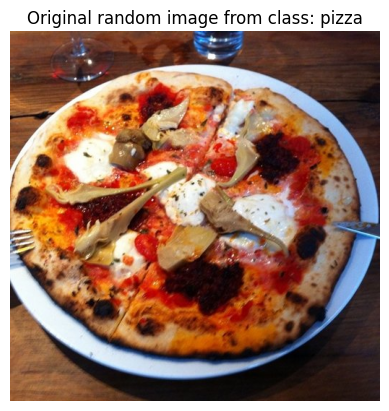

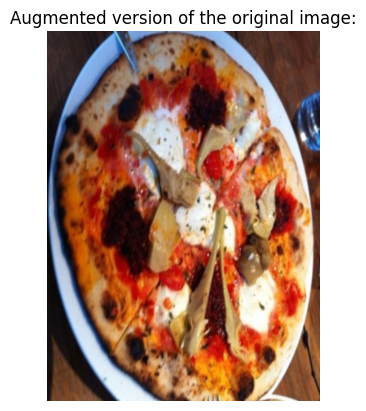

In [8]:
# View random image and compare it to its augmented version
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

target_class = random.choice(train_data_1_pct.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# Read in random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False)
#plt.imshow(mpimg.imread(random_image_path))
#print(random_image_path)

# Plot augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title("Augmented version of the original image:")
plt.axis(False);


## model_1: Feature extraction transfer learning on 1% of the data with data augmentation.

In [9]:
input_shape = (224, 224, 3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

base_model.tranaible = False

inputs = keras.layers.Input(shape=input_shape, name="model_1")

x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="GlobalAveragePooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make model
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1_pct = model_1.fit(train_data_1_pct,
                            epochs=5,
                            steps_per_epoch=len(train_data_1_pct),
                            validation_data=test_data,
                            validation_steps=int(0.25*len(test_data)),
                            callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                   experiment_name="1_pct_data_aug")])


24274472/24274472 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/1_pct_data_aug/20231207-160919
Epoch 1/5
3/3 [==============================] - 70s 3s/step - loss: 2.5150 - accuracy: 0.1429 - val_loss: 2.4577 - val_accuracy: 0.1891
Epoch 2/5
3/3 [==============================] - 7s 2s/step - loss: 2.2898 - accuracy: 0.2714 - val_loss: 2.7583 - val_accuracy: 0.1069
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 2.3993 - accuracy: 0.1143 - val_loss: 2.1972 - val_accuracy: 0.1661
Epoch 4/5
3/3 [==============================] - 6s 2s/step - loss: 2.1571 - accuracy: 0.2429 - val_loss: 2.1633 - val_accuracy: 0.1661
Epoch 5/5
3/3 [==============================] - 7s 2s/step - loss: 2.0730 - accuracy: 0.1857 - val_loss: 2.5220 - val_accuracy: 0.1924


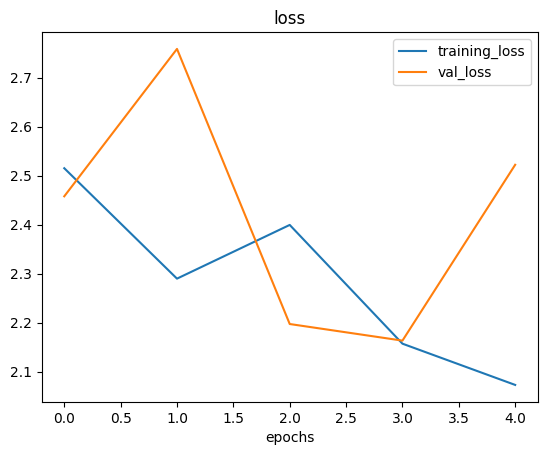

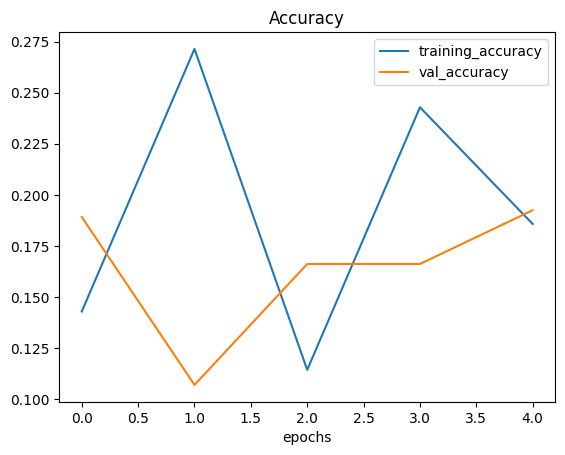

In [10]:
plot_loss_curves(history_1_pct)

In [11]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 GlobalAveragePooling_layer  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                             

In [13]:
# Evaluate on the entire test dataset
results_1_pct_data_aug = model_1.evaluate(test_data)
results_1_pct_data_aug

79/79 [==============================] - 6s 67ms/step - loss: 2.5525 - accuracy: 0.1768


[2.552462577819824, 0.17679999768733978]

## model_2: Feature extraction transfer learning on 10% of the data with data augmentation

In [14]:
# Get data
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"

--2023-12-07 16:14:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   279MB/s    in 0.6s    

2023-12-07 16:14:30 (279 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [15]:
# Unzip data
unzip_data("10_food_classes_10_percent.zip")

In [16]:
train_dir_10_pct = "10_food_classes_10_percent/train/"

In [17]:
# Create data loader for 10% train data

train_data_10_pct = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_pct,
                                                                        label_mode="categorical",
                                                                        batch_size=BATCH_SIZE,
                                                                        image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.


### Bulding model_2

### Creating a ModelCheckpoint Callback

The ModelCheckpoint callback intermediately saves our model (the full model or just the weights) during training. this is useful so we can come and start where we left off.

In [18]:
# Create checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weghts/checkpoint.ckpt"

# Create a model checkpoint callback that saves the model's weights only
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=True,
                                                       save_freq="epoch",
                                                       verbose=1)


In [22]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation state with horizontal flipping, rotations, zooms etc
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
    # preprocessing.Rescale(1./255) # Used for models like ResNet50V2. EfficientNet has rescaling already built-in.
], name="data_augmentation")

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_2D_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10_pct = model_2.fit(train_data_10_pct,
                             epochs=5,
                             steps_per_epoch=len(train_data_10_pct),
                             validation_data=test_data,
                             validation_steps=int(0.25 * len(test_data)),
                             callbacks=([create_tensorboard_callback(dir_name="transfer_learning",
                                                                   experiment_name="10_pct_train_data_aug")],
                                        checkpoint_callback))


Saving TensorBoard log files to: transfer_learning/10_pct_train_data_aug/20231207-161633
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9709 - accuracy: 0.3533
Epoch 1: val_loss improved from inf to 1.48061, saving model to ten_percent_model_checkpoints_weghts/checkpoint.ckpt
24/24 [==============================] - 24s 680ms/step - loss: 1.9709 - accuracy: 0.3533 - val_loss: 1.4806 - val_accuracy: 0.6283
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3646 - accuracy: 0.6667
Epoch 2: val_loss improved from 1.48061 to 1.05597, saving model to ten_percent_model_checkpoints_weghts/checkpoint.ckpt
24/24 [==============================] - 15s 620ms/step - loss: 1.3646 - accuracy: 0.6667 - val_loss: 1.0560 - val_accuracy: 0.7237
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0874 - accuracy: 0.7333
Epoch 3: val_loss improved from 1.05597 to 0.85335, saving model to ten_percent_model_checkpoints_weghts/checkpoint.ckpt
24/24 [==

In [23]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_2D_  (None, 1280)              0         
 layer (GlobalAveragePoolin                                      
 g2D)                                                            
                                                                 
 output_layer (Dense)        (None, 10)                1281

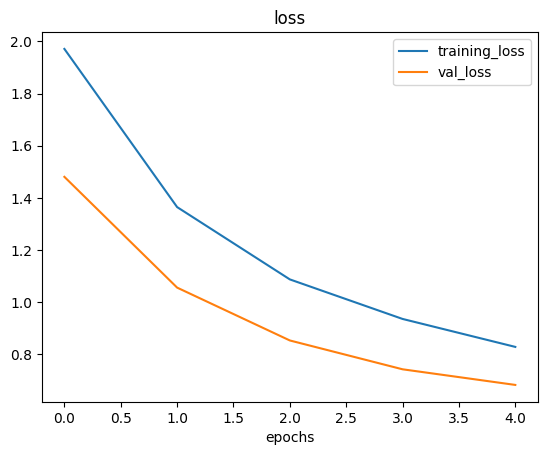

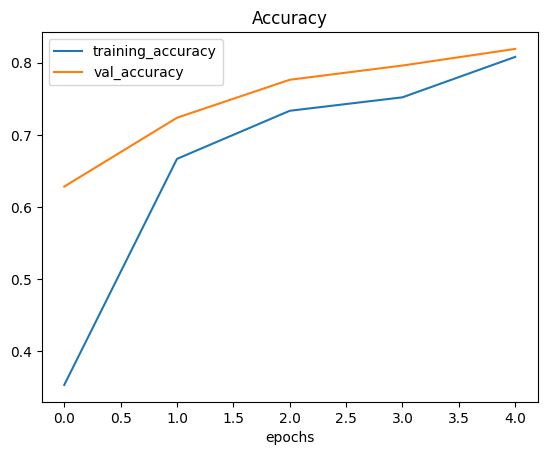

In [24]:
plot_loss_curves(history_10_pct)

In [25]:
results_model_2_aug_data = model_2.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.6582 - accuracy: 0.8276


### Loading in checkpointed weights

Loading in checkpointed weights returns a model to a specific checkpoint

In [26]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [27]:
# Evaluate model_2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 0.6582 - accuracy: 0.8276


In [28]:
loaded_weights_model_results

[0.6582109332084656, 0.8276000022888184]

In [29]:
results_model_2_aug_data

[0.6582109928131104, 0.8276000022888184]

In [31]:
# Comare results
import numpy as np
np.isclose(loaded_weights_model_results, results_model_2_aug_data)

array([ True,  True])

In [32]:
# Are these models trainale?
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7f255014b370> True
<keras.src.engine.sequential.Sequential object at 0x7f24aff0c880> True
<keras.src.engine.functional.Functional object at 0x7f24aa332740> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f25501bb010> True
<keras.src.layers.core.dense.Dense object at 0x7f25728112a0> True


In [33]:
# Check layers inside base model (EfficientNetV2B0), and check if layers are trainable or not
for index, layer in enumerate(model_2.layers[2].layers):
  print(index, layer, layer.name, layer.trainable)

0 <keras.src.engine.input_layer.InputLayer object at 0x7f24d5963250> input_2 False
1 <keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f24aff0e650> rescaling_1 False
2 <keras.src.layers.preprocessing.normalization.Normalization object at 0x7f24aff0ded0> normalization_1 False
3 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f24aff0dea0> stem_conv False
4 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f24aff0f280> stem_bn False
5 <keras.src.layers.core.activation.Activation object at 0x7f24aff39510> stem_activation False
6 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f24aff38550> block1a_project_conv False
7 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f24aff399f0> block1a_project_bn False
8 <keras.src.layers.core.activation.Activation object at 0x7f24aff38730> block1a_project_activation False
9 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f24aff3b8

In [34]:
# Check if any layer is tainable
for index, layer in enumerate(model_2.layers[2].layers):
  if layer.trainable == True:
    print(index, layer)

## Fine-tuning

In [35]:
# To start fine-tuning: Begin with setting the last 10 layers of the base model.trainable = True
base_model.trainable = True

# Freeze all layers excpet for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine-tuning, you typically want to lower the learning rate by 10x
                metrics=["accuracy"])

**Note** When fine-tuning, it's best practice to lower the learning rate. Standards state at least 10x.

In [36]:
for index, layer in enumerate(base_model.layers):
  if layer.trainable == True:
    print(index, layer)

260 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f24aa4f3d00>
261 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f24aa4ab820>
262 <keras.src.layers.merging.multiply.Multiply object at 0x7f24aa4f2f20>
263 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f24aa311b70>
264 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f24aa313f10>
265 <keras.src.layers.regularization.dropout.Dropout object at 0x7f24aa311270>
266 <keras.src.layers.merging.add.Add object at 0x7f24aa313ee0>
267 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f24aff38670>
268 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f24aa310490>
269 <keras.src.layers.core.activation.Activation object at 0x7f24aff39d50>


In [39]:
for index, layer in enumerate(model_2.layers[2].layers):
    print(index, layer.trainable)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [40]:
print(len(model_2.trainable_variables))

12


In [41]:
# Fine-tune for another 5 epochs
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_pct,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               validation_steps=int(0.25*len(test_data)),
                                               initial_epoch=history_10_pct.epoch[-1], # start training from previously last epoch
                                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                      experiment_name="fine_tune_10_pct_data_aug")])

Saving TensorBoard log files to: transfer_learning/fine_tune_10_pct_data_aug/20231207-163459
Epoch 5/10
24/24 [==============================] - 23s 536ms/step - loss: 0.7296 - accuracy: 0.7840 - val_loss: 0.5544 - val_accuracy: 0.8306
Epoch 6/10
24/24 [==============================] - 11s 462ms/step - loss: 0.6189 - accuracy: 0.8093 - val_loss: 0.5097 - val_accuracy: 0.8322
Epoch 7/10
24/24 [==============================] - 13s 514ms/step - loss: 0.5570 - accuracy: 0.8147 - val_loss: 0.4603 - val_accuracy: 0.8405
Epoch 8/10
24/24 [==============================] - 10s 375ms/step - loss: 0.4981 - accuracy: 0.8587 - val_loss: 0.4562 - val_accuracy: 0.8470
Epoch 9/10
24/24 [==============================] - 10s 426ms/step - loss: 0.4837 - accuracy: 0.8413 - val_loss: 0.4405 - val_accuracy: 0.8536
Epoch 10/10
24/24 [==============================] - 11s 433ms/step - loss: 0.4241 - accuracy: 0.8733 - val_loss: 0.4273 - val_accuracy: 0.8586


In [42]:
results_fine_tune_10_pct = model_2.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 0.4451 - accuracy: 0.8572


In [43]:
results_fine_tune_10_pct

[0.44509488344192505, 0.857200026512146]

In [45]:
results_model_2_aug_data

[0.6582109928131104, 0.8276000022888184]

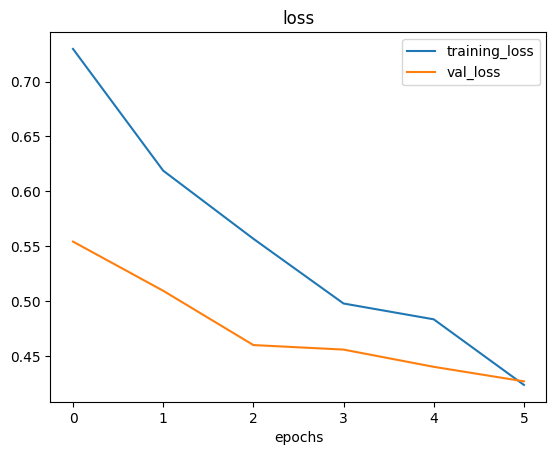

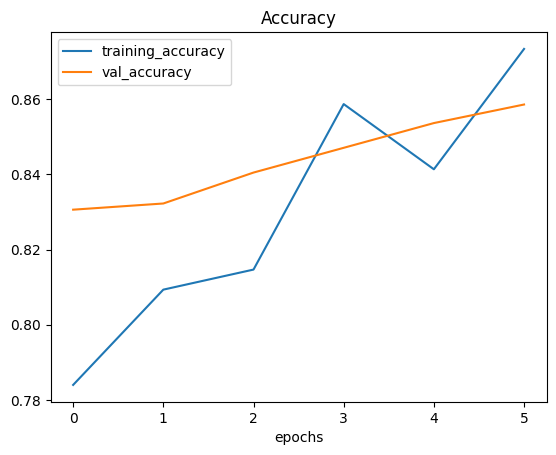

In [44]:
plot_loss_curves(history_fine_10_percent_data_aug)

The `plot_loss_curves()`function works great with models that have only been fit once, but not ideal for comparing one series of running `fit()`with another, such as compare loss curves before and after fine-tuning.

In [52]:
# Create a function to compare training histories
def compare_histories(original_history, post_history, initial_epochs):
  """
  Compare two TensorFlow History objects.
  """
  # Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with post history metrics
  total_acc = acc + post_history.history["accuracy"]
  total_loss = loss + post_history.history["loss"]

  total_val_acc = val_acc + post_history.history["val_accuracy"]
  total_val_loss = val_loss + post_history.history["val_loss"]

  # Create plots for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Validation Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  # Create plots for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Validation Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

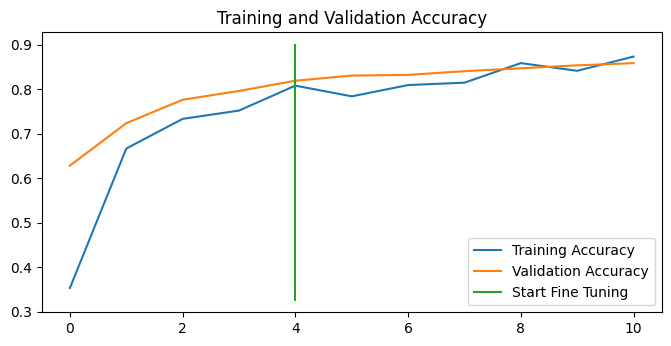

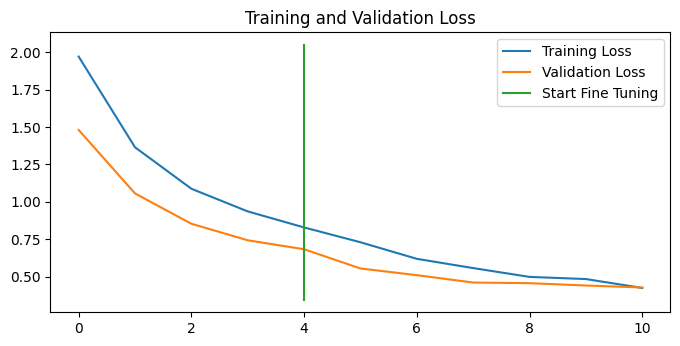

In [53]:
compare_histories(original_history=history_10_pct,
                  post_history=history_fine_10_percent_data_aug,
                  initial_epochs=5)

# Model_4: Fine-tuning existing model on 100% of the data

In [55]:
# Download and unzip 10 classes of Food101 data with all images
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"

unzip_data("10_food_classes_all_data.zip")

--2023-12-07 17:15:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  45.0MB/s    in 10s     

2023-12-07 17:15:29 (49.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [56]:
# Set train and test directories
train_dir_all_data = "10_food_classes_all_data/train/"
test_dir_all_data = "10_food_classes_all_data/test/"

In [59]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [57]:
# Setup data loaders
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                     label_mode="categorical",
                                                                     batch_size=BATCH_SIZE,
                                                                     image_size=IMG_SIZE)

test_data_all = tf.keras.preprocessing.image_dataset_from_directory(test_dir_all_data,
                                                                    label_mode="categorical",
                                                                    batch_size=BATCH_SIZE,
                                                                    image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [61]:
model_2.evaluate(test_data_all)

79/79 [==============================] - 9s 98ms/step - loss: 0.4451 - accuracy: 0.8572


[0.44509488344192505, 0.857200026512146]

In [60]:
results_fine_tune_10_pct

[0.44509488344192505, 0.857200026512146]

- To train a fine-tuning model (model_4) we need to revert model_2 back to its feature extraction weights.

In [62]:
# Load weights from checkpoint, that way we can fine-tune from
# the same stage the 10 percent data model was fine tuned from.
model_2.load_weights(checkpoint_path)

ValueError: ignored

In [ ]:
# Helps reverting
from keras import backend as K
K.clear_session()

In [65]:
model_2.evaluate(test_data_all)

79/79 [==============================] - 9s 80ms/step - loss: 0.6582 - accuracy: 0.8276


[0.6582111120223999, 0.8276000022888184]